# Calendar Spread

To implement this [strategy](https://www.investopedia.com/terms/c/calendarspread.asp), the trader sells a short-term option (either a call or a put) and buys a long-term option of same type, both options with the same strike. As such, it is a debit spread, the maximum loss being the amount paid for the strategy.

**Caveat: Options are very risky derivatives and, like any other type of financial vehicle, trading options requires due diligence. Transactions shown as examples of trading strategies with options in this notebook are not recommendations.**

In [1]:
from __future__ import print_function

import datetime as dt
import sys

from optionlab import VERSION, run_strategy, plot_pl

%matplotlib inline

In [2]:
print(f"Python version: {sys.version}")
print(f"OptionLab version: {VERSION}")

Python version: 3.11.9 | packaged by Anaconda, Inc. | (main, Apr 19 2024, 16:40:41) [MSC v.1916 64 bit (AMD64)]
OptionLab version: 1.4.3


The underlying asset is Apple stock (ticker: APPL). We consider the stock price on January 18, 2021. The strategy involves selling 1000 calls with a strike of 127, expiring on January 29, 2021, and buying 1000 calls with a strike of 127, expiring on February 12, 2021. The first leg of the strategy earns us a premium of 4.60 per option, while the second leg costs us 5.90 per option.

In [3]:
stock_price = 127.14
volatility = 0.427
start_date = dt.date(2021, 1, 18)
target_date = dt.date(2021, 1, 29)
interest_rate = 0.0009
min_stock = stock_price - round(stock_price * 0.5, 2)
max_stock = stock_price + round(stock_price * 0.5, 2)
strategy = [
    {"type": "call", "strike": 127.00, "premium": 4.60, "n": 1000, "action": "sell"},
    {
        "type": "call",
        "strike": 127.00,
        "premium": 5.90,
        "n": 1000,
        "action": "buy",
        "expiration": dt.date(2021, 2, 12),
    },
]

inputs = {
    "stock_price": stock_price,
    "start_date": start_date,
    "target_date": target_date,
    "volatility": volatility,
    "interest_rate": interest_rate,
    "min_stock": min_stock,
    "max_stock": max_stock,
    "strategy": strategy,
}

In [4]:
%%time
out = run_strategy(inputs)

CPU times: total: 375 ms
Wall time: 485 ms


Profit/Loss diagram:
--------------------
The vertical green dashed line corresponds to the position of the stock's spot price. The right and left arrow markers indicate the strike prices of calls and puts, respectively, with blue representing long and red representing short positions.


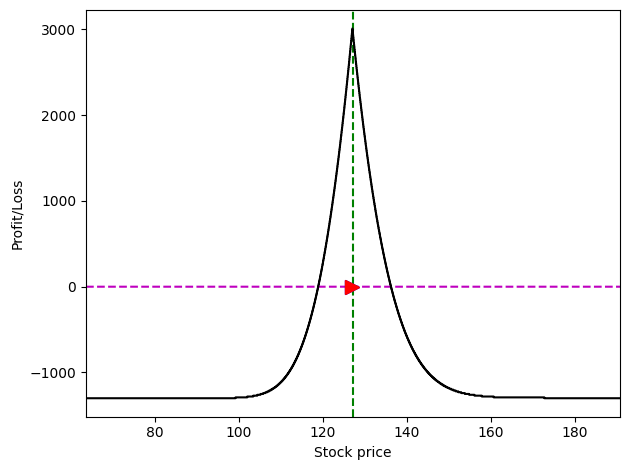

In [5]:
plot_pl(out)

In [6]:
print(out)

Probability of profit: 0.599111819020198
Profit ranges: [(118.87, 136.15)]
Per leg cost: [4600.0, -5900.0]
Strategy cost: -1300.0
Minimum return in the domain: -1300.0000000000146
Maximum return in the domain: 3009.999999999999
Implied volatility: [0.47300000000000003, 0.419]
In the money probability: [0.4895105709759477, 0.4805997906939539]
Delta: [-0.5216914758915705, 0.5273457614638198]
Gamma: [0.03882722919950356, 0.02669940508461828]
Theta: [0.22727438444823292, -0.15634971608107964]
Vega: [0.09571294014902997, 0.1389462831961853]
Rho: [-0.022202087247849632, 0.046016214466188525]

